In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gurobipy import *


Bad key text.latex.unicode in file C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key text.latex.unicode in file C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You

## Parte I: Facility Location Problem Capacitado Mono-Producto y Mono-Periodo

### a) Caso restricción: 
\begin{align}Y_{ij} < X_i\end{align}

#### Conjuntos:

* I = Bodegas = 10

* J = Clientes = 20

#### Parámetros:

$CF_i$ = Costo fijo de instalar la bodega i 

$R_i$ = Costo unitario de transportar productos desde la bodega i

$T_{ij}$ = Costo unitario de transporte productos desde la bodega i hasta el cliente j

$Q_i$ = Capacidad de almacenamiento de productos de la bodega i

$d_j$ = Demanda de productos del cliente j

In [2]:
bodegas = 10
clientes = 20
I = [i+1 for i in range(bodegas)]
J = [j+1 for j in range(clientes)]
arcos=[(i,j) for i in I for j in J]

np.random.seed(2)
x_bodegas=list(np.random.random(len(I))*100)
y_bodegas=list(np.random.random(len(I))*100)
x_clientes=list(np.random.random(len(J))*100)
y_clientes=list(np.random.random(len(J))*100)
distancias={(i+1,j+1):np.hypot(x_bodegas[i]-x_clientes[j],y_bodegas[i]-y_clientes[j]) for i in range(len(I)) for j in range(len(J))} 

K = {i:np.random.randint(2000,3000) for i in I}
R = {i:np.random.randint(100,300) for i in I}
T = distancias
Q = {i:np.random.randint(300,800) for i in I}
D = {j:np.random.randint(200,300) for j in J}

#### Variables de decisión:

$X_i$ = 1 Si se instala una bodega en el sitio i, 0 de otro modo.

$Y_{ij}$ = 1 Si se asigna el cliente j a la bodega i, 0 de otro modo.

In [3]:
model_FLP_a = Model('model_FLP_a')
#model_FLP_a.setParam('LogToConsole', 0)

Academic license - for non-commercial use only - expires 2022-01-12
Academic license - for non-commercial use only - expires 2022-01-12
Using license file C:\Users\LabCivil1-Pc1\gurobi.lic
Using license file C:\Users\LabCivil1-Pc1\gurobi.lic


In [4]:
IJ = [(i,j) for i in I for j in J]
X = model_FLP_a.addVars(I, vtype=GRB.BINARY, name='X')
Y = model_FLP_a.addVars(IJ, vtype=GRB.BINARY, name='Y')

#### Modelo

\begin{align}
Min \sum_{i=1}^IK_i*X_i + \sum_{i=1}^I\sum_{j=1}^J(T_{ij}+R_i)*D_j*Y_{ij} \\ 
\sum_{i=1}^IY_{ij} = 1 && \forall j = 1,...,J \\ 
Y_{ij} \leq X_i && \forall i=1,...,I, \forall j = 1,...,J \\ 
\sum_{i=1}^IX_i \geq 1 \\ 
\sum_{j=1}^JY_{ij}*D_j \leq X_i*Q_i && \forall i = 1,..., I
\end{align}

In [5]:
objective = quicksum(K[i]*X[i] for i in I) + quicksum((T[(i,j)]+R[i])*D[j]*Y[(i,j)] for i,j in IJ)
model_FLP_a.setObjective(expr=objective, sense=GRB.MINIMIZE)
model_FLP_a.addConstrs(quicksum(Y[(i,j)] for i in I)==1 for j in J)
model_FLP_a.addConstrs(Y[(i,j)]<=X[i] for i,j in IJ)
model_FLP_a.addConstr(quicksum(X[i] for i in I)>=1)
model_FLP_a.addConstrs(quicksum(Y[(i,j)]*D[j] for j in J)<=X[i]*Q[i] for i in I)
model_FLP_a.update()

In [6]:
model_FLP_a.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 231 rows, 210 columns and 820 nonzeros
Optimize a model with 231 rows, 210 columns and 820 nonzeros
Model fingerprint: 0xe24a6303
Variable types: 0 continuous, 210 integer (210 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+02]
  Objective range  [2e+03, 1e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 1303466.2293
Presolve removed 56 rows and 0 columns
Model fingerprint: 0xe24a6303
Variable types: 0 continuous, 210 integer (210 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+02]
  Objective range  [2e+03, 1e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 13

In [7]:
for v in model_FLP_a.getVars():
    print(str(v.VarName)+'='+str(round(v.x,2)))

X[1]=1.0
X[2]=1.0
X[3]=1.0
X[4]=1.0
X[5]=1.0
X[6]=1.0
X[7]=1.0
X[8]=1.0
X[9]=1.0
X[10]=1.0
Y[1,1]=-0.0
Y[1,2]=-0.0
Y[1,3]=-0.0
Y[1,4]=-0.0
Y[1,5]=1.0
Y[1,6]=-0.0
Y[1,7]=-0.0
Y[1,8]=-0.0
Y[1,9]=1.0
Y[1,10]=-0.0
Y[1,11]=1.0
Y[1,12]=-0.0
Y[1,13]=-0.0
Y[1,14]=-0.0
Y[1,15]=-0.0
Y[1,16]=-0.0
Y[1,17]=-0.0
Y[1,18]=-0.0
Y[1,19]=-0.0
Y[1,20]=-0.0
Y[2,1]=-0.0
Y[2,2]=1.0
Y[2,3]=-0.0
Y[2,4]=-0.0
Y[2,5]=-0.0
Y[2,6]=-0.0
Y[2,7]=-0.0
Y[2,8]=-0.0
Y[2,9]=-0.0
Y[2,10]=-0.0
Y[2,11]=-0.0
Y[2,12]=-0.0
Y[2,13]=-0.0
Y[2,14]=-0.0
Y[2,15]=-0.0
Y[2,16]=-0.0
Y[2,17]=-0.0
Y[2,18]=-0.0
Y[2,19]=-0.0
Y[2,20]=-0.0
Y[3,1]=-0.0
Y[3,2]=-0.0
Y[3,3]=-0.0
Y[3,4]=-0.0
Y[3,5]=-0.0
Y[3,6]=-0.0
Y[3,7]=-0.0
Y[3,8]=-0.0
Y[3,9]=-0.0
Y[3,10]=-0.0
Y[3,11]=-0.0
Y[3,12]=-0.0
Y[3,13]=-0.0
Y[3,14]=-0.0
Y[3,15]=-0.0
Y[3,16]=-0.0
Y[3,17]=1.0
Y[3,18]=1.0
Y[3,19]=-0.0
Y[3,20]=-0.0
Y[4,1]=-0.0
Y[4,2]=0.0
Y[4,3]=-0.0
Y[4,4]=-0.0
Y[4,5]=-0.0
Y[4,6]=-0.0
Y[4,7]=-0.0
Y[4,8]=0.0
Y[4,9]=-0.0
Y[4,10]=-0.0
Y[4,11]=-0.0
Y[4,12]=-0.0
Y[4,13]=1.0
Y[4,1

In [8]:
arcos_activos=[k for k in arcos if Y[k].x>0.99]

In [9]:
model_FLP_a.ObjVal

1137338.1398864486

1137338.1398864486

In [10]:
model_FLP_a.Runtime

0.05584716796875

0.05584716796875

In [11]:
model_FLP_a_relaxed = model_FLP_a.relax()
model_FLP_a_relaxed.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 231 rows, 210 columns and 820 nonzeros
Optimize a model with 231 rows, 210 columns and 820 nonzeros
Model fingerprint: 0xb3c6a492
Model fingerprint: 0xb3c6a492
Coefficient statistics:
Coefficient statistics:
  Matrix range     [1e+00, 8e+02]
  Matrix range     [1e+00, 8e+02]
  Objective range  [2e+03, 1e+05]
  Objective range  [2e+03, 1e+05]
  Bounds range     [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.00s
Presolved: 231 rows, 210 columns, 820 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.9767608e+05   6.873438e+02   0.000000e+00      0s
      59    1.1084056e+06   0.000000e+0

In [12]:
for v in model_FLP_a_relaxed.getVars():
    print(str(v.VarName)+'='+str(round(v.x,2)))

X[1]=1.0
X[2]=1.0
X[3]=1.0
X[4]=0.0
X[5]=1.0
X[6]=0.82
X[7]=1.0
X[8]=1.0
X[9]=1.0
X[10]=1.0
Y[1,1]=0.0
Y[1,2]=0.0
Y[1,3]=0.0
Y[1,4]=0.0
Y[1,5]=0.59
Y[1,6]=0.0
Y[1,7]=0.0
Y[1,8]=0.0
Y[1,9]=1.0
Y[1,10]=0.0
Y[1,11]=1.0
Y[1,12]=0.0
Y[1,13]=0.0
Y[1,14]=0.0
Y[1,15]=0.0
Y[1,16]=0.0
Y[1,17]=0.0
Y[1,18]=0.0
Y[1,19]=0.0
Y[1,20]=0.43
Y[2,1]=0.0
Y[2,2]=1.0
Y[2,3]=0.0
Y[2,4]=0.0
Y[2,5]=0.41
Y[2,6]=0.0
Y[2,7]=0.0
Y[2,8]=0.0
Y[2,9]=0.0
Y[2,10]=0.0
Y[2,11]=0.0
Y[2,12]=0.0
Y[2,13]=0.0
Y[2,14]=0.0
Y[2,15]=0.0
Y[2,16]=0.0
Y[2,17]=0.0
Y[2,18]=0.0
Y[2,19]=0.0
Y[2,20]=0.0
Y[3,1]=0.0
Y[3,2]=0.0
Y[3,3]=0.0
Y[3,4]=0.0
Y[3,5]=0.0
Y[3,6]=0.0
Y[3,7]=0.0
Y[3,8]=0.0
Y[3,9]=0.0
Y[3,10]=0.0
Y[3,11]=0.0
Y[3,12]=0.0
Y[3,13]=0.0
Y[3,14]=0.0
Y[3,15]=0.0
Y[3,16]=0.12
Y[3,17]=1.0
Y[3,18]=1.0
Y[3,19]=0.0
Y[3,20]=0.0
Y[4,1]=0.0
Y[4,2]=0.0
Y[4,3]=0.0
Y[4,4]=0.0
Y[4,5]=0.0
Y[4,6]=0.0
Y[4,7]=0.0
Y[4,8]=0.0
Y[4,9]=0.0
Y[4,10]=0.0
Y[4,11]=0.0
Y[4,12]=0.0
Y[4,13]=0.0
Y[4,14]=0.0
Y[4,15]=0.0
Y[4,16]=0.0
Y[4,17]=0.0
Y[4,18]=0.0
Y[4,

In [13]:
model_FLP_a_relaxed.ObjVal

1108405.5542667445

1108405.5542667445

In [14]:
model_FLP_a_relaxed.Runtime

0.0079803466796875

0.0079803466796875

In [15]:
GAP = (model_FLP_a.ObjVal-model_FLP_a_relaxed.ObjVal)/model_FLP_a.ObjVal
round(GAP*100,2)

2.54

2.54

### Gráfico Solución

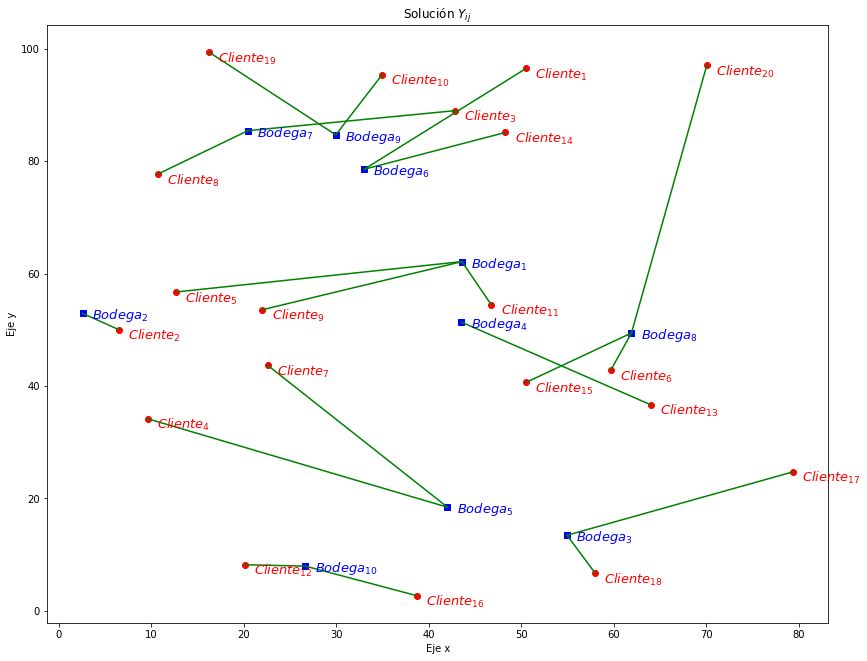

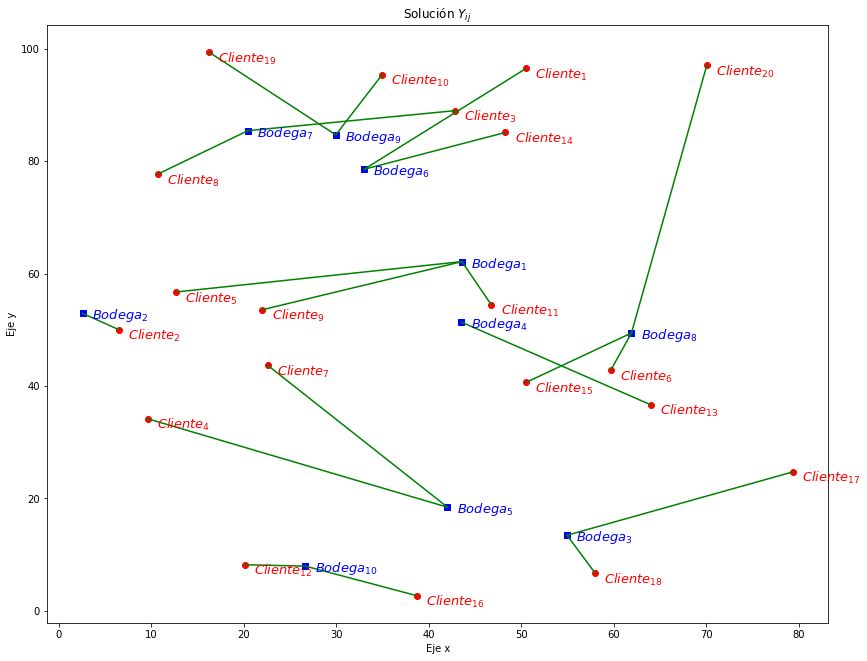

In [16]:
plt.figure(figsize=(14,11));
plt.scatter(x_bodegas,y_bodegas,color="blue",marker="s");
plt.scatter(x_clientes,y_clientes,color="red");

for i in range(len(I)):
    plt.annotate("$Bodega_{%d}$"%(i+1),(x_bodegas[i]+1,y_bodegas[i]-1),size=13, color="blue");

for j in range(len(J)):
    plt.annotate("$Cliente_{%d}$"%(j+1),(x_clientes[j]+1,y_clientes[j]-1.8),size=13, color="red",weight="bold");
    
for n in arcos_activos:
    i=n[0]
    j=n[1]
    plt.plot([x_bodegas[i-1],x_clientes[j-1]],[y_bodegas[i-1],y_clientes[j-1]],color="green")

plt.xlabel("Eje x");
plt.ylabel("Eje y");
plt.title("Solución $Y_{ij}$");
plt.show();

### b) Caso  restricción:
\begin{align}\sum_{j=1}^JY_{ij}<=M*X{i}&&\forall i = 1,...,J\end{align}

In [17]:
model_FLP_b = Model('model_FLP_b')
#model_FLP_b.setParam('LogToConsole', 0)

In [18]:
X,Y = None, None
M = len(J)

In [19]:
X = model_FLP_b.addVars(I, vtype=GRB.BINARY, name='X')
Y = model_FLP_b.addVars(IJ, vtype=GRB.BINARY, name='Y')

In [20]:
objective = quicksum(K[i]*X[i] for i in I) + quicksum((T[(i,j)]+R[i])*D[j]*Y[(i,j)] for i,j in IJ)
model_FLP_b.setObjective(expr=objective, sense=GRB.MINIMIZE)
model_FLP_b.addConstrs(quicksum(Y[(i,j)] for i in I)==1 for j in J)
model_FLP_b.addConstrs(quicksum(Y[(i,j)] for j in J)<=X[i]*M for i in I)
model_FLP_b.addConstr(quicksum(X[i] for i in I)>=1)
model_FLP_b.addConstrs(quicksum(Y[(i,j)]*D[j] for j in J)<=X[i]*Q[i] for i in I)
model_FLP_b.update()
model_FLP_b.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 41 rows, 210 columns and 630 nonzeros
Model fingerprint: 0xc3f84208
Variable types: 0 continuous, 210 integer (210 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+02]
  Objective range  [2e+03, 1e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 1303466.2293
Optimize a model with 41 rows, 210 columns and 630 nonzeros
Model fingerprint: 0xc3f84208
Variable types: 0 continuous, 210 integer (210 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+02]
  Objective range  [2e+03, 1e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 1303466.2293
Presolve removed 10 rows and 0

In [21]:
for v in model_FLP_b.getVars():
    print(str(v.VarName)+'='+str(round(v.x,2)))

X[1]=1.0
X[2]=1.0
X[3]=1.0
X[4]=1.0
X[5]=1.0
X[6]=1.0
X[7]=1.0
X[8]=1.0
X[9]=1.0
X[10]=1.0
Y[1,1]=-0.0
Y[1,2]=-0.0
Y[1,3]=-0.0
Y[1,4]=-0.0
Y[1,5]=1.0
Y[1,6]=-0.0
Y[1,7]=-0.0
Y[1,8]=-0.0
Y[1,9]=1.0
Y[1,10]=-0.0
Y[1,11]=1.0
Y[1,12]=-0.0
Y[1,13]=0.0
Y[1,14]=-0.0
Y[1,15]=-0.0
Y[1,16]=-0.0
Y[1,17]=-0.0
Y[1,18]=-0.0
Y[1,19]=-0.0
Y[1,20]=0.0
Y[2,1]=-0.0
Y[2,2]=1.0
Y[2,3]=-0.0
Y[2,4]=-0.0
Y[2,5]=-0.0
Y[2,6]=-0.0
Y[2,7]=-0.0
Y[2,8]=-0.0
Y[2,9]=-0.0
Y[2,10]=-0.0
Y[2,11]=-0.0
Y[2,12]=-0.0
Y[2,13]=-0.0
Y[2,14]=-0.0
Y[2,15]=-0.0
Y[2,16]=-0.0
Y[2,17]=-0.0
Y[2,18]=-0.0
Y[2,19]=-0.0
Y[2,20]=-0.0
Y[3,1]=-0.0
Y[3,2]=-0.0
Y[3,3]=-0.0
Y[3,4]=-0.0
Y[3,5]=-0.0
Y[3,6]=-0.0
Y[3,7]=-0.0
Y[3,8]=-0.0
Y[3,9]=-0.0
Y[3,10]=-0.0
Y[3,11]=-0.0
Y[3,12]=-0.0
Y[3,13]=-0.0
Y[3,14]=-0.0
Y[3,15]=-0.0
Y[3,16]=-0.0
Y[3,17]=1.0
Y[3,18]=1.0
Y[3,19]=-0.0
Y[3,20]=-0.0
Y[4,1]=0.0
Y[4,2]=-0.0
Y[4,3]=-0.0
Y[4,4]=-0.0
Y[4,5]=-0.0
Y[4,6]=-0.0
Y[4,7]=-0.0
Y[4,8]=-0.0
Y[4,9]=-0.0
Y[4,10]=-0.0
Y[4,11]=0.0
Y[4,12]=-0.0
Y[4,13]=1.0
Y[4,14]

In [22]:
arcos_activos=[k for k in arcos if Y[k].x>0.99]

In [23]:
model_FLP_b.ObjVal

1137338.1398864486

1137338.1398864486

In [24]:
model_FLP_b.Runtime

0.039897918701171875

0.039897918701171875

In [25]:
model_FLP_b_relaxed = model_FLP_b.relax()
model_FLP_b_relaxed.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 41 rows, 210 columns and 630 nonzeros
Optimize a model with 41 rows, 210 columns and 630 nonzeros
Model fingerprint: 0x9405ff5c
Model fingerprint: 0x9405ff5c
Coefficient statistics:
Coefficient statistics:
  Matrix range     [1e+00, 8e+02]
  Matrix range     [1e+00, 8e+02]
  Objective range  [2e+03, 1e+05]
  Objective range  [2e+03, 1e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.00s
Presolved: 41 rows, 210 columns, 630 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.9767608e+05   2.273438e+02   0.000000e+00      0s
      39    1.1076967e+06   0.000000e+00   0.000000e+00      0s

  Bounds range     [1e+00, 1e+00]
  RHS range

In [26]:
for v in model_FLP_b_relaxed.getVars():
    print(str(v.VarName)+'='+str(round(v.x,2)))

X[1]=1.0
X[2]=1.0
X[3]=1.0
X[4]=0.0
X[5]=1.0
X[6]=0.82
X[7]=1.0
X[8]=1.0
X[9]=1.0
X[10]=0.79
Y[1,1]=0.0
Y[1,2]=0.0
Y[1,3]=0.0
Y[1,4]=0.0
Y[1,5]=0.59
Y[1,6]=0.0
Y[1,7]=0.0
Y[1,8]=0.0
Y[1,9]=1.0
Y[1,10]=0.0
Y[1,11]=1.0
Y[1,12]=0.0
Y[1,13]=0.0
Y[1,14]=0.0
Y[1,15]=0.0
Y[1,16]=0.0
Y[1,17]=0.0
Y[1,18]=0.0
Y[1,19]=0.0
Y[1,20]=0.43
Y[2,1]=0.0
Y[2,2]=1.0
Y[2,3]=0.0
Y[2,4]=0.0
Y[2,5]=0.41
Y[2,6]=0.0
Y[2,7]=0.0
Y[2,8]=0.0
Y[2,9]=0.0
Y[2,10]=0.0
Y[2,11]=0.0
Y[2,12]=0.0
Y[2,13]=0.0
Y[2,14]=0.0
Y[2,15]=0.0
Y[2,16]=0.0
Y[2,17]=0.0
Y[2,18]=0.0
Y[2,19]=0.0
Y[2,20]=0.0
Y[3,1]=0.0
Y[3,2]=0.0
Y[3,3]=0.0
Y[3,4]=0.0
Y[3,5]=0.0
Y[3,6]=0.0
Y[3,7]=0.0
Y[3,8]=0.0
Y[3,9]=0.0
Y[3,10]=0.0
Y[3,11]=0.0
Y[3,12]=0.0
Y[3,13]=0.0
Y[3,14]=0.0
Y[3,15]=0.0
Y[3,16]=0.12
Y[3,17]=1.0
Y[3,18]=1.0
Y[3,19]=0.0
Y[3,20]=0.0
Y[4,1]=0.0
Y[4,2]=0.0
Y[4,3]=0.0
Y[4,4]=0.0
Y[4,5]=0.0
Y[4,6]=0.0
Y[4,7]=0.0
Y[4,8]=0.0
Y[4,9]=0.0
Y[4,10]=0.0
Y[4,11]=0.0
Y[4,12]=0.0
Y[4,13]=0.0
Y[4,14]=0.0
Y[4,15]=0.0
Y[4,16]=0.0
Y[4,17]=0.0
Y[4,18]=0.0
Y[4

In [27]:
model_FLP_b_relaxed.ObjVal

1107696.6702895337

1107696.6702895337

In [28]:
model_FLP_b_relaxed.Runtime

0.00897216796875

0.00897216796875

In [29]:
GAP = (model_FLP_b.ObjVal-model_FLP_b_relaxed.ObjVal)/model_FLP_b.ObjVal
round(GAP*100, 2)

2.61

2.61

### Grafico Solucion

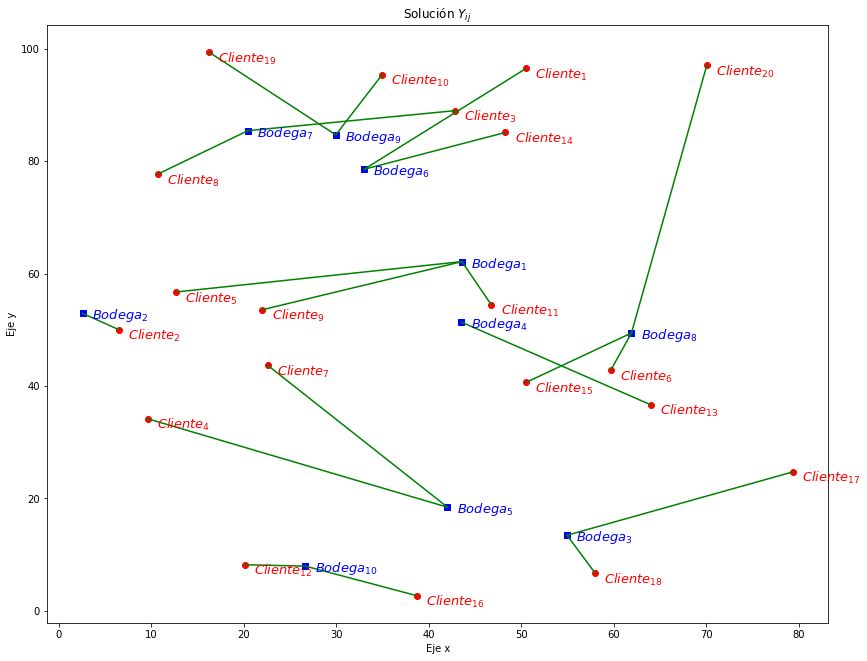

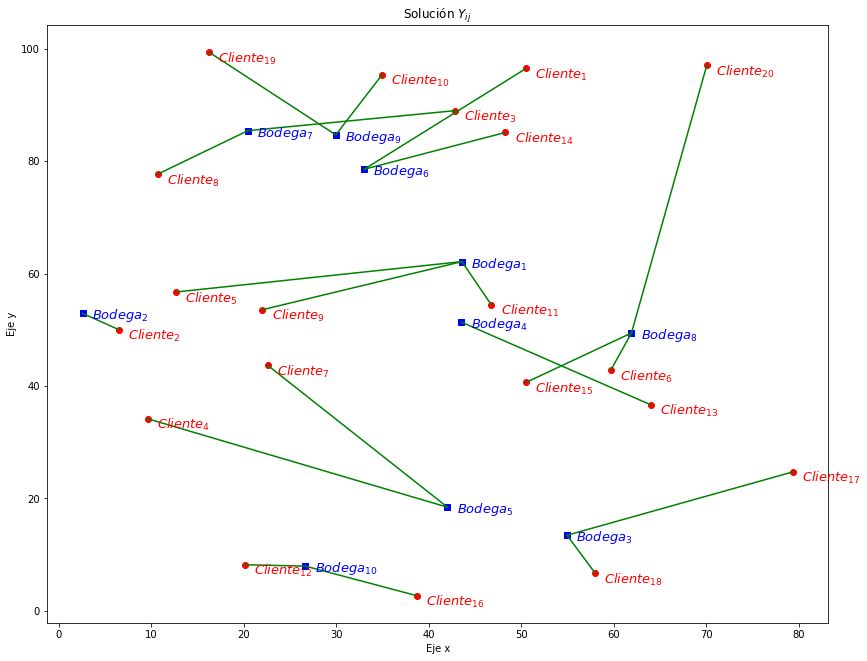

In [30]:
plt.figure(figsize=(14,11));
plt.scatter(x_bodegas,y_bodegas,color="blue",marker="s");
plt.scatter(x_clientes,y_clientes,color="red");

for i in range(len(I)):
    plt.annotate("$Bodega_{%d}$"%(i+1),(x_bodegas[i]+1,y_bodegas[i]-1),size=13, color="blue");

for j in range(len(J)):
    plt.annotate("$Cliente_{%d}$"%(j+1),(x_clientes[j]+1,y_clientes[j]-1.8),size=13, color="red",weight="bold");
    
for n in arcos_activos:
    i=n[0]
    j=n[1]
    plt.plot([x_bodegas[i-1],x_clientes[j-1]],[y_bodegas[i-1],y_clientes[j-1]],color="green")

plt.xlabel("Eje x");
plt.ylabel("Eje y");
plt.title("Solución $Y_{ij}$");
plt.show();

## Parte II: Lot-Sizing Problem Capacitado Mono-Producto

### a) Caso variable:
\begin{align}X_{t} \end{align}
#### Conjuntos: 

* Periodos (T) = 10

#### Parámetros:

$P_t$ = Costo unitario de producción en el periodo t

$F_t$ = Costo fijo de ordenar en el periodo t

$H_t$ = Costo unitario de almacenamiento en el periodo t

$D_t$ = Demanda de unidades para el periodo t

$M_t$ = Valor mas grande posible para el periodo t

\begin{align}
M_t = \sum_{s=t}^TD_s &&  \forall t=1,...,T
\end{align}

In [31]:
np.random.seed(2)
T = [t+1 for t in range(10)]
P = {t:np.random.randint(100,200) for t in T}
K = {t:np.random.randint(1000,2000) for t in T}
H = {t:np.random.randint(50,200) for t in T}
D = {t:np.random.randint(1000,5000) for t in T}
sumador=0
for t in range(len(T)):
    sumador+=D[t+1]
Q =sumador/len(D)
M = {t:sum(list(D.values())[t-1:]) for t in T}

#### Variables de decisión:

$X_t$ = Unidades a producir en el periodo t

$Y_t$ = 1, si se produce en el periodo t

$I_t$ = Unidades almacenadas en el periodo t

In [32]:
model_LZP_a = Model('model_LZP_a')
#model_LZP_a.setParam('LogToConsole', 0)

In [33]:
X = model_LZP_a.addVars(T, vtype=GRB.CONTINUOUS, name='X')
Y = model_LZP_a.addVars(T, vtype=GRB.BINARY, name='Y')
I = model_LZP_a.addVars([0]+T, vtype=GRB.CONTINUOUS, name='I')

#### Modelo:

\begin{align}
Min\sum_{t=1}^TP_t*X_t + \sum_{t=1}^TK_t*Y_t + \sum_{t=1}^TH_t*I_t \\ \\
I_t - X_t - I_{t-1} = -D_t && \forall t = 1,...,T \\
X_t \leq M_t*Y_t && \forall t = 1,...,T \\
X_t \leq Q && \forall t = 1,...,T\\
I_0,I_T = 0 \\
X_t, I_t \geq 0 && \forall t = 1,...,T \\
Y_t \in \{0,1\}
\end{align}

In [34]:
objective = None
objective = quicksum(P[t]*X[t] for t in T)+quicksum(K[t]*Y[t] for t in T)+quicksum(H[t]*I[t] for t in T)
model_LZP_a.setObjective(expr=objective, sense=GRB.MINIMIZE)
model_LZP_a.addConstrs(I[t]-X[t]-I[t-1]==-1*D[t] for t in T)
model_LZP_a.addConstrs(X[t]<=M[t]*Y[t] for t in T)
model_LZP_a.addConstrs(X[t]<=Q for t in T)
model_LZP_a.addConstr(I[0]==0)
model_LZP_a.addConstr(I[T[-1]]==0)
model_LZP_a.update()
model_LZP_a.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 32 rows, 31 columns and 62 nonzeros
Model fingerprint: 0x22427338
Variable types: 21 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+04]
Optimize a model with 32 rows, 31 columns and 62 nonzeros
Model fingerprint: 0x22427338
Variable types: 21 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+04]
  Objective range  [5e+01, 2e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 5e+03]
Presolve removed 32 rows and 31 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
  Objective range  [5e+01, 2e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 5e+03]
Presolve removed 32 rows and 31 co

In [35]:
for v in model_LZP_a.getVars():
    print(str(v.VarName)+'='+str(round(v.x,2)))

X[1]=3157.0
X[2]=3157.0
X[3]=3157.0
X[4]=3157.0
X[5]=3157.0
X[6]=3157.0
X[7]=3157.0
X[8]=3157.0
X[9]=3157.0
X[10]=3157.0
Y[1]=1.0
Y[2]=1.0
Y[3]=1.0
Y[4]=1.0
Y[5]=1.0
Y[6]=1.0
Y[7]=1.0
Y[8]=1.0
Y[9]=1.0
Y[10]=1.0
I[0]=0.0
I[1]=1902.0
I[2]=664.0
I[3]=1472.0
I[4]=2517.0
I[5]=894.0
I[6]=1725.0
I[7]=356.0
I[8]=1138.0
I[9]=12.0
I[10]=0.0
X[1]=3157.0
X[2]=3157.0
X[3]=3157.0
X[4]=3157.0
X[5]=3157.0
X[6]=3157.0
X[7]=3157.0
X[8]=3157.0
X[9]=3157.0
X[10]=3157.0
Y[1]=1.0
Y[2]=1.0
Y[3]=1.0
Y[4]=1.0
Y[5]=1.0
Y[6]=1.0
Y[7]=1.0
Y[8]=1.0
Y[9]=1.0
Y[10]=1.0
I[0]=0.0
I[1]=1902.0
I[2]=664.0
I[3]=1472.0
I[4]=2517.0
I[5]=894.0
I[6]=1725.0
I[7]=356.0
I[8]=1138.0
I[9]=12.0
I[10]=0.0


In [36]:
produccion=[X[k].x for k in T]
inventario=[I[k].x for k in T]
produccion, inventario

([3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0],
 [1902.0, 664.0, 1472.0, 2517.0, 894.0, 1725.0, 356.0, 1138.0, 12.0, 0.0])

([3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0],
 [1902.0, 664.0, 1472.0, 2517.0, 894.0, 1725.0, 356.0, 1138.0, 12.0, 0.0])

In [37]:
model_LZP_a.ObjVal

5780249.0

5780249.0

In [38]:
model_LZP_a.Runtime

0.018951416015625

0.018951416015625

In [39]:
model_LZP_a_relaxed = model_LZP_a.relax()
model_LZP_a_relaxed.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 32 rows, 31 columns and 62 nonzeros
Optimize a model with 32 rows, 31 columns and 62 nonzeros
Model fingerprint: 0x5e60b4de
Model fingerprint: 0x5e60b4de
Coefficient statistics:
Coefficient statistics:
  Matrix range     [1e+00, 3e+04]
  Matrix range     [1e+00, 3e+04]
  Objective range  [5e+01, 2e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 5e+03]
Presolve removed 32 rows and 31 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
  Objective range  [5e+01, 2e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 5e+03]
Presolve removed 32 rows and 31 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.  

In [40]:
for v in model_LZP_a_relaxed.getVars():
    print(str(v.VarName)+'='+str(round(v.x,2)))

X[1]=3157.0
X[2]=3157.0
X[3]=3157.0
X[4]=3157.0
X[5]=3157.0
X[6]=3157.0
X[7]=3157.0
X[8]=3157.0
X[9]=3157.0
X[10]=3157.0
Y[1]=0.1
Y[2]=0.1
Y[3]=0.12
Y[4]=0.13
Y[5]=0.15
Y[6]=0.19
Y[7]=0.22
Y[8]=0.32
Y[9]=0.42
Y[10]=1.0
I[0]=0.0
I[1]=1902.0
I[2]=664.0
I[3]=1472.0
I[4]=2517.0
I[5]=894.0
I[6]=1725.0
I[7]=356.0
I[8]=1138.0
I[9]=12.0
I[10]=0.0
X[1]=3157.0
X[2]=3157.0
X[3]=3157.0
X[4]=3157.0
X[5]=3157.0
X[6]=3157.0
X[7]=3157.0
X[8]=3157.0
X[9]=3157.0
X[10]=3157.0
Y[1]=0.1
Y[2]=0.1
Y[3]=0.12
Y[4]=0.13
Y[5]=0.15
Y[6]=0.19
Y[7]=0.22
Y[8]=0.32
Y[9]=0.42
Y[10]=1.0
I[0]=0.0
I[1]=1902.0
I[2]=664.0
I[3]=1472.0
I[4]=2517.0
I[5]=894.0
I[6]=1725.0
I[7]=356.0
I[8]=1138.0
I[9]=12.0
I[10]=0.0


In [41]:
model_LZP_a_relaxed.ObjVal

5769397.856098097

5769397.856098097

In [42]:
model_LZP_a_relaxed.Runtime

0.005985260009765625

0.005985260009765625

In [43]:
GAP = (model_LZP_a.ObjVal-model_LZP_a_relaxed.ObjVal)/model_LZP_a.ObjVal
round(GAP*100,2)

0.19

0.19

### Grafico Solucion

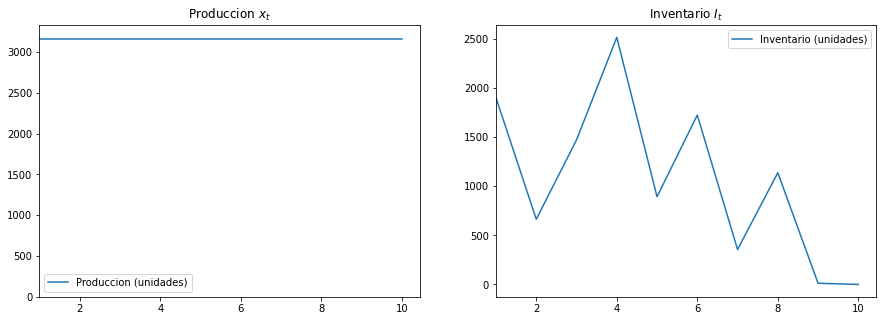

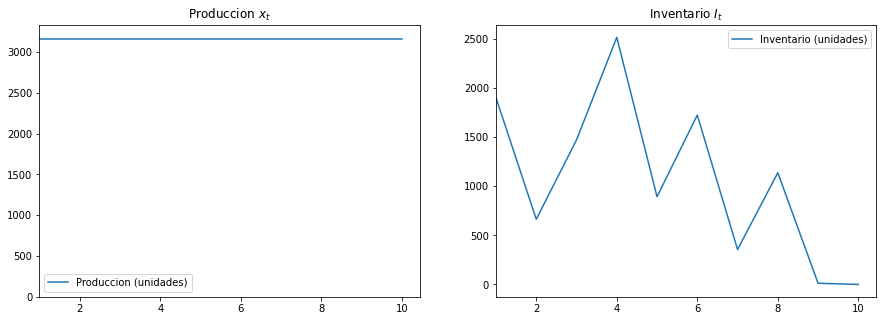

In [44]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)
ax.plot(T,produccion,label="Produccion (unidades)")
ax.set_title("Produccion $x_{t}$")
ax.set_ylim(0.0)
ax.set_xlim(1)
ax.legend()

ax = fig.add_subplot(122)
ax.plot(T,inventario,label="Inventario (unidades)")
ax.set_title("Inventario $I_{t}$")
ax.set_xlim(1)
ax.legend()

### b) Caso variable:
\begin{align}W_{ts} \end{align}

In [45]:
X, Y, I = None, None, None

In [46]:
model_LZP_b = Model('Model_LZP_b')
#model_LZP_b.setParam('LogToConsole',0)

In [47]:
TS = [(t,s) for t in T for s in T[t-1:]]

In [48]:
W = model_LZP_b.addVars(TS, vtype=GRB.CONTINUOUS, name='W')
Y = model_LZP_b.addVars(T, vtype=GRB.BINARY, name='Y')
I = model_LZP_b.addVars([0]+T, vtype=GRB.CONTINUOUS, name='I')

In [49]:
objective = None
objective = quicksum(P[t]*W[(t,s)] for t,s in TS)+ quicksum(K[t]*Y[t] for t in T)+ quicksum(H[t]*I[t] for t in T)
model_LZP_b.setObjective(expr=objective, sense=GRB.MINIMIZE)
model_LZP_b.addConstrs((I[t]-quicksum(W[(t,s)] for s in T[t-1:]) - I[t-1]==-1*D[t] for t in T), name='(1)')
model_LZP_b.addConstrs((quicksum(W[(i,t)] for i in T[:t]) == D[t] for t in T), name='(2)')
model_LZP_b.addConstrs((W[(t,s)]<=D[s]*Y[t] for t,s in TS), name='(3)')
model_LZP_b.addConstrs((quicksum(W[(t,s)] for s in T[t-1:])<=Q for t in T), name='(4)')
model_LZP_b.addConstr(I[0]==0, name='(5)')
model_LZP_b.addConstr(I[T[-1]]==0, name='(6)')

model_LZP_b.update()
model_LZP_b.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 87 rows, 76 columns and 297 nonzeros
Optimize a model with 87 rows, 76 columns and 297 nonzeros
Model fingerprint: 0xd71a53b1
Model fingerprint: 0xd71a53b1
Variable types: 66 continuous, 10 integer (10 binary)
Variable types: 66 continuous, 10 integer (10 binary)
Coefficient statistics:
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  Matrix range     [1e+00, 5e+03]
  Objective range  [5e+01, 2e+03]
  Objective range  [5e+01, 2e+03]
  Bounds range     [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 5e+03]
  RHS range        [1e+03, 5e+03]
Presolve removed 79 rows and 54 columns
Presolve removed 79 rows and 54 columns
Presolve time: 0.00s
Presolve time: 0.00s
Presolved:

In [50]:
for v in model_LZP_b.getVars():
    print(str(v.VarName)+'='+str(round(v.x,2)))

W[1,1]=1255.0
W[1,2]=1238.0
W[1,3]=0.0
W[1,4]=0.0
W[1,5]=664.0
W[1,6]=0.0
W[1,7]=0.0
W[1,8]=0.0
W[1,9]=0.0
W[1,10]=0.0
W[2,2]=3157.0
W[2,3]=0.0
W[2,4]=0.0
W[2,5]=0.0
W[2,6]=0.0
W[2,7]=0.0
W[2,8]=0.0
W[2,9]=0.0
W[2,10]=0.0
W[3,3]=2349.0
W[3,4]=0.0
W[3,5]=0.0
W[3,6]=452.0
W[3,7]=0.0
W[3,8]=356.0
W[3,9]=0.0
W[3,10]=0.0
W[4,4]=2112.0
W[4,5]=959.0
W[4,6]=0.0
W[4,7]=86.0
W[4,8]=0.0
W[4,9]=0.0
W[4,10]=0.0
W[5,5]=3157.0
W[5,6]=0.0
W[5,7]=0.0
W[5,8]=0.0
W[5,9]=0.0
W[5,10]=0.0
W[6,6]=1874.0
W[6,7]=1283.0
W[6,8]=0.0
W[6,9]=0.0
W[6,10]=0.0
W[7,7]=3157.0
W[7,8]=0.0
W[7,9]=0.0
W[7,10]=0.0
W[8,8]=2019.0
W[8,9]=1138.0
W[8,10]=0.0
W[9,9]=3145.0
W[9,10]=12.0
W[10,10]=3157.0
Y[1]=1.0
Y[2]=1.0
Y[3]=1.0
Y[4]=1.0
Y[5]=1.0
Y[6]=1.0
Y[7]=1.0
Y[8]=1.0
Y[9]=1.0
Y[10]=1.0
I[0]=0.0
I[1]=1902.0
I[2]=664.0
I[3]=1472.0
I[4]=2517.0
I[5]=894.0
I[6]=1725.0
I[7]=356.0
I[8]=1138.0
I[9]=12.0
I[10]=0.0
W[1,1]=1255.0
W[1,2]=1238.0
W[1,3]=0.0
W[1,4]=0.0
W[1,5]=664.0
W[1,6]=0.0
W[1,7]=0.0
W[1,8]=0.0
W[1,9]=0.0
W[1,10]=0.0
W[2

In [51]:
produccion=[]
sumador=0
for t in T:
    for s in range(t,len(T)+1):
        sumador+=W[t,s].x
    produccion.append(sumador)
    sumador=0
    
inventario=[I[k].x for k in T]
produccion, inventario

([3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0],
 [1902.0, 664.0, 1472.0, 2517.0, 894.0, 1725.0, 356.0, 1138.0, 12.0, 0.0])

([3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0,
  3157.0],
 [1902.0, 664.0, 1472.0, 2517.0, 894.0, 1725.0, 356.0, 1138.0, 12.0, 0.0])

In [52]:
model_LZP_b.ObjVal

5780249.0

5780249.0

In [53]:
model_LZP_b.Runtime

0.023935317993164062

0.023935317993164062

In [54]:
model_LZP_b_relaxed = model_LZP_b.relax()
model_LZP_b_relaxed.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 87 rows, 76 columns and 297 nonzeros
Optimize a model with 87 rows, 76 columns and 297 nonzeros
Model fingerprint: 0xfcea52d2
Model fingerprint: 0xfcea52d2
Coefficient statistics:
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  Matrix range     [1e+00, 5e+03]
  Objective range  [5e+01, 2e+03]
  Objective range  [5e+01, 2e+03]
  Bounds range     [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+03, 5e+03]
  RHS range        [1e+03, 5e+03]
Presolve removed 20 rows and 9 columns
Presolve removed 20 rows and 9 columns
Presolve time: 0.00s
Presolve time: 0.00s
Presolved: 67 rows, 67 columns, 247 nonzeros
Presolved: 67 rows, 67 columns, 247 nonzeros


Iteration    Objective      

In [55]:
for v in model_LZP_b_relaxed.getVars():
    print(str(v.VarName)+'='+str(round(v.x,2)))

W[1,1]=1255.0
W[1,2]=1902.0
W[1,3]=0.0
W[1,4]=0.0
W[1,5]=0.0
W[1,6]=0.0
W[1,7]=0.0
W[1,8]=0.0
W[1,9]=0.0
W[1,10]=0.0
W[2,2]=2493.0
W[2,3]=664.0
W[2,4]=0.0
W[2,5]=0.0
W[2,6]=0.0
W[2,7]=0.0
W[2,8]=0.0
W[2,9]=0.0
W[2,10]=0.0
W[3,3]=1685.0
W[3,4]=1144.56
W[3,5]=327.44
W[3,6]=0.0
W[3,7]=0.0
W[3,8]=0.0
W[3,9]=0.0
W[3,10]=0.0
W[4,4]=967.44
W[4,5]=2189.56
W[4,6]=0.0
W[4,7]=0.0
W[4,8]=0.0
W[1,1]=1255.0
W[1,2]=1902.0
W[1,3]=0.0
W[1,4]=0.0
W[1,5]=0.0
W[1,6]=0.0
W[1,7]=0.0
W[1,8]=0.0
W[1,9]=0.0
W[1,10]=0.0
W[2,2]=2493.0
W[2,3]=664.0
W[2,4]=0.0
W[2,5]=0.0
W[2,6]=0.0
W[2,7]=0.0
W[2,8]=0.0
W[2,9]=0.0
W[2,10]=0.0
W[3,3]=1685.0
W[3,4]=1144.56
W[3,5]=327.44
W[3,6]=0.0
W[3,7]=0.0
W[3,8]=0.0
W[3,9]=0.0
W[3,10]=0.0
W[4,4]=967.44
W[4,5]=2189.56
W[4,6]=0.0
W[4,7]=0.0
W[4,8]=0.0
W[4,9]=0.0
W[4,10]=0.0
W[5,5]=2263.0
W[5,6]=894.0
W[5,7]=0.0
W[5,8]=0.0
W[5,9]=0.0
W[5,10]=0.0
W[6,6]=1432.0
W[6,7]=1725.0
W[6,8]=0.0
W[6,9]=0.0
W[6,10]=0.0
W[7,7]=2801.0
W[7,8]=356.0
W[7,9]=0.0
W[7,10]=0.0
W[8,8]=2019.0
W[8,9]=1138.0

In [56]:
model_LZP_b_relaxed.ObjVal

5775873.757469927

5775873.757469927

In [57]:
model_LZP_b_relaxed.Runtime

0.008945465087890625

0.008945465087890625

In [58]:
GAP = (model_LZP_b.ObjVal-model_LZP_b_relaxed.ObjVal)/model_LZP_b.ObjVal
round(GAP*100,2)

0.08

0.08

### Gráfico Solución

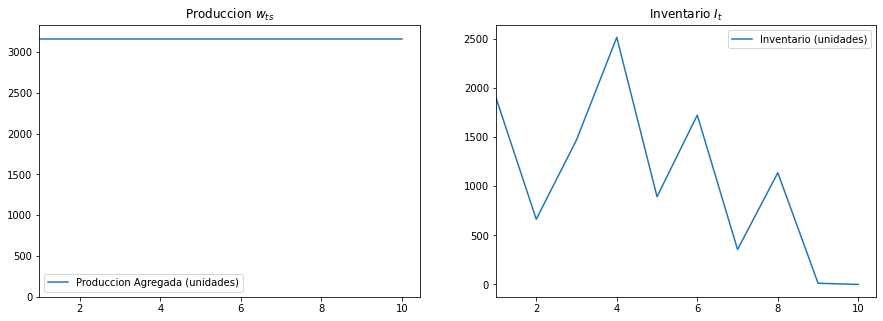

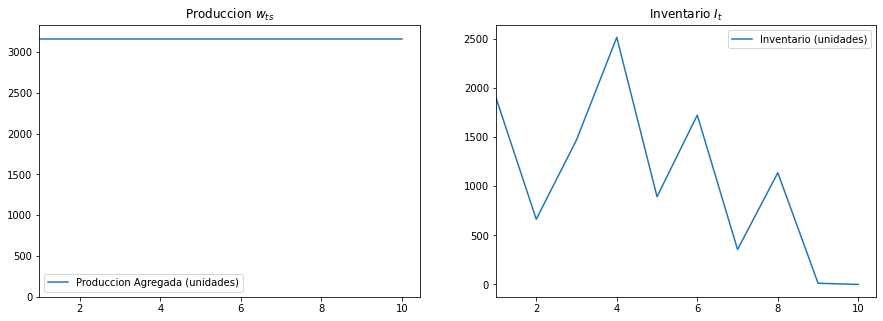

In [59]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)
ax.plot(T,produccion,label="Produccion Agregada (unidades)")
ax.set_title("Produccion $w_{ts}$")
ax.set_ylim(0.0)
ax.set_xlim(1)
ax.legend()

ax = fig.add_subplot(122)
ax.plot(T,inventario,label="Inventario (unidades)")
ax.set_title("Inventario $I_{t}$")
ax.set_xlim(1)
ax.legend()

## Parte III: Travelling Salesman Problem
### a) Caso flujo entero mono-producto

In [60]:
np.random.seed(1)
Nodos = 10
N = [n+1 for n in range(Nodos)]
arcos=[(i,j) for i in N for j in N if i!=j]

x_coor=list(np.random.random(len(N))*100)
y_coor=list(np.random.random(len(N))*100)

distancias={(i+1,j+1):np.hypot(x_coor[i]-x_coor[j],y_coor[i]-y_coor[j]) for i in range(len(N)) for j in range(len(N)) if i!=j} 

C = distancias
IJ = [(i,j) for i in N for j in N if i!=j]

In [61]:
model_TSP_a = Model('model_TSP_a')
#model_TSP_a.setParam('LogToConsole', 0)

In [62]:
Y, F = None, None

In [63]:
Y = model_TSP_a.addVars(IJ, vtype=GRB.BINARY, name='Y')
F = model_TSP_a.addVars(IJ, vtype=GRB.CONTINUOUS, name='F')

In [64]:
objective = quicksum(C[(i,j)]*Y[(i,j)] for i,j in IJ)
model_TSP_a.setObjective(expr=objective, sense=GRB.MINIMIZE)

In [65]:
model_TSP_a.addConstrs(quicksum(Y[(i,j)] for j in N if i!=j)==1 for i in N)
model_TSP_a.addConstrs(quicksum(Y[(j,i)] for j in N if i!=j)==1 for i in N)
model_TSP_a.addConstrs(F[(i,j)]<=(len(N)-1)*Y[(i,j)] for i,j in IJ)
model_TSP_a.addConstr(quicksum(F[(1,j)] for j in N if 1!=j)-quicksum(F[(j,1)] for j in N if 1!=j)==(len(N)-1))
model_TSP_a.addConstrs(quicksum(F[(i,j)] for j in N if i!=j)-quicksum(F[(j,i)] for j in N if i!=j)==-1 for i in N[1:])
model_TSP_a.update()
model_TSP_a.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 120 rows, 180 columns and 540 nonzeros
Model fingerprint: 0x0c422d62
Variable types: 90 continuous, 90 integer (90 binary)
Coefficient statistics:
Optimize a model with 120 rows, 180 columns and 540 nonzeros
Model fingerprint: 0x0c422d62
Variable types: 90 continuous, 90 integer (90 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+00]
  Matrix range     [1e+00, 9e+00]
  Objective range  [2e+01, 9e+01]
  Objective range  [2e+01, 9e+01]
  Bounds range     [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+00]
Presolve removed 19 rows and 18 columns
Presolve time: 0.00s
Presolved: 101 rows, 162 columns, 477 nonzeros
Variable types: 72 continuous, 90 integer (90 binary)


In [66]:
for v in model_TSP_a.getVars():
    print(str(v.VarName)+'='+str(round(v.x,2)))

Y[1,2]=-0.0
Y[1,3]=-0.0
Y[1,4]=-0.0
Y[1,5]=-0.0
Y[1,6]=-0.0
Y[1,7]=-0.0
Y[1,8]=1.0
Y[1,9]=-0.0
Y[1,10]=0.0
Y[2,1]=0.0
Y[2,3]=-0.0
Y[2,4]=1.0
Y[2,5]=-0.0
Y[2,6]=-0.0
Y[2,7]=-0.0
Y[2,8]=0.0
Y[2,9]=-0.0
Y[2,10]=-0.0
Y[3,1]=-0.0
Y[3,2]=-0.0
Y[3,4]=-0.0
Y[3,5]=1.0
Y[3,6]=-0.0
Y[3,7]=0.0
Y[3,8]=-0.0
Y[3,9]=-0.0
Y[3,10]=-0.0
Y[4,1]=-0.0
Y[4,2]=0.0
Y[4,3]=-0.0
Y[4,5]=-0.0
Y[4,6]=1.0
Y[4,7]=-0.0
Y[4,8]=-0.0
Y[4,9]=-0.0
Y[4,10]=-0.0
Y[5,1]=-0.0
Y[5,2]=-0.0
Y[5,3]=0.0
Y[5,4]=-0.0
Y[5,6]=-0.0
Y[5,7]=-0.0
Y[5,8]=-0.0
Y[5,9]=1.0
Y[5,10]=-0.0
Y[6,1]=-0.0
Y[6,2]=-0.0
Y[6,3]=-0.0
Y[6,4]=0.0
Y[6,5]=-0.0
Y[6,7]=1.0
Y[6,8]=-0.0
Y[6,9]=-0.0
Y[6,10]=-0.0
Y[7,1]=-0.0
Y[7,2]=-0.0
Y[7,3]=1.0
Y[7,4]=-0.0
Y[7,5]=-0.0
Y[7,6]=0.0
Y[7,8]=-0.0
Y[7,9]=-0.0
Y[7,10]=-0.0
Y[8,1]=0.0
Y[8,2]=1.0
Y[8,3]=-0.0
Y[8,4]=-0.0
Y[8,5]=-0.0
Y[8,6]=-0.0
Y[8,7]=-0.0
Y[8,9]=-0.0
Y[8,10]=-0.0
Y[9,1]=0.0
Y[9,2]=-0.0
Y[9,3]=-0.0
Y[9,4]=-0.0
Y[9,5]=0.0
Y[9,6]=-0.0
Y[9,7]=-0.0
Y[9,8]=-0.0
Y[9,10]=1.0
Y[10,1]=1.0
Y[10,2]=-0.0
Y[10,3]=-0.0
Y

In [67]:
arcos_activos=[k for k in arcos if Y[k].x>0.99]
flujos=[F[k].x for k in arcos if F[k].x>0.99]
arcos_activos,flujos

([(1, 8),
  (2, 4),
  (3, 5),
  (4, 6),
  (5, 9),
  (6, 7),
  (7, 3),
  (8, 2),
  (9, 10),
  (10, 1)],
 [9.0,
  7.0,
  3.0,
  5.999999999999999,
  2.0,
  4.999999999999999,
  3.999999999999999,
  8.0,
  1.0])

([(1, 8),
  (2, 4),
  (3, 5),
  (4, 6),
  (5, 9),
  (6, 7),
  (7, 3),
  (8, 2),
  (9, 10),
  (10, 1)],
 [9.0,
  7.0,
  3.0,
  5.999999999999999,
  2.0,
  4.999999999999999,
  3.999999999999999,
  8.0,
  1.0])

In [68]:
model_TSP_a.ObjVal

277.0761938420476

277.0761938420476

In [69]:
model_TSP_a.Runtime

0.033908843994140625

0.033908843994140625

### Gráfico Solución TSP flujo entero mono_producto

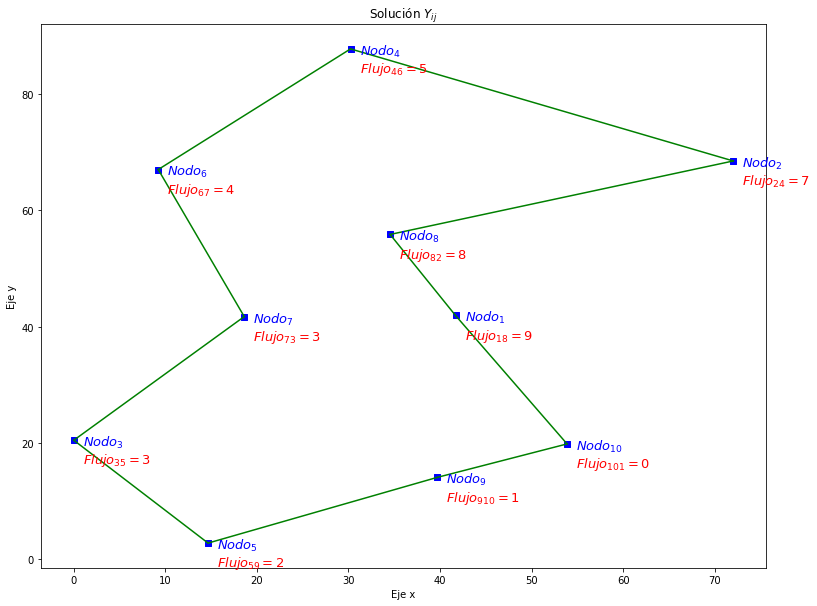

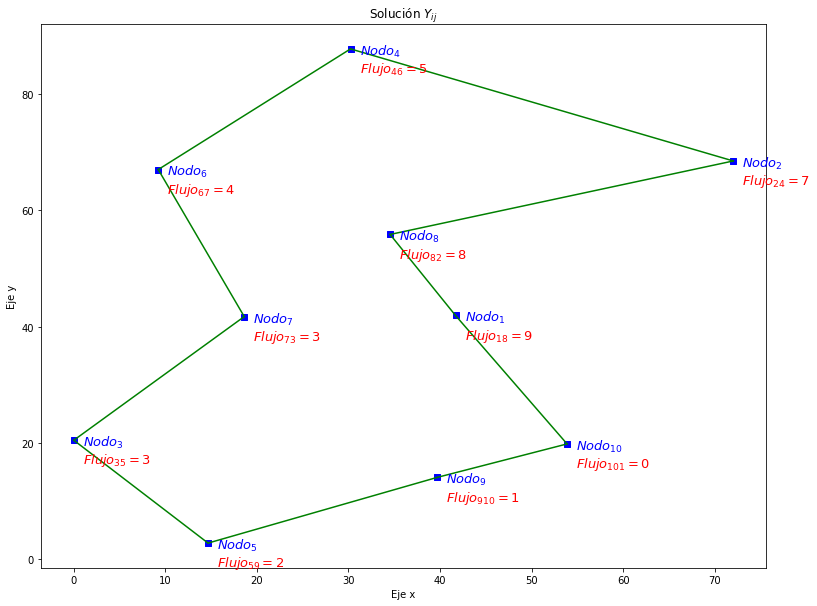

In [70]:
plt.figure(figsize=(13,10));
plt.scatter(x_coor,y_coor,color="blue",marker="s");

for i in range(len(N)):
    plt.annotate("$Nodo_{%d}$"%(i+1),(x_coor[i]+1,y_coor[i]-1),size=13, color="blue");


for n in arcos_activos:
    i=n[0]
    j=n[1]
    plt.plot([x_coor[i-1],x_coor[j-1]],[y_coor[i-1],y_coor[j-1]],color="green")
    plt.annotate("$Flujo_{%d%d}=%d$"%(i,j,F[i,j].x),(x_coor[i-1]+1,y_coor[i-1]-4),size=13, color="red")

plt.xlabel("Eje x");
plt.ylabel("Eje y");
plt.title("Solución $Y_{ij}$");
plt.show();

### b) Caso flujo binario multi-producto

In [71]:
Y, F = None, None
K = [k+1 for k in range(Nodos)]
IJK = [(i,j,k) for i,j in IJ for k in K]

In [72]:
model_TSP_b = Model('model_TSP_b')
#model_TSP_b.setParam('LogToConsole', 1)

In [73]:
Y = model_TSP_b.addVars(IJ, vtype=GRB.BINARY, name='Y')
F = model_TSP_b.addVars(IJK, vtype=GRB.CONTINUOUS, name='F')

In [74]:
objective = quicksum(C[(i,j)]*Y[(i,j)] for i,j in IJ)
model_TSP_b.setObjective(expr=objective, sense=GRB.MINIMIZE)

In [75]:
def RHS(i,k):
    if i == 1:
        rhs = 1
    elif i!=k and i!=1:
        rhs =  0
    elif i==k and i!=1:
        rhs = -1
    return rhs

In [76]:
model_TSP_b.addConstrs(quicksum(Y[(i,j)] for j in N if j!=i)==1 for i in N)
model_TSP_b.addConstrs(quicksum(Y[(j,i)] for j in N if j!=i)==1 for i in N)
model_TSP_b.addConstrs(F[(i,j,k)]<=Y[(i,j)] for i,j in IJ for k in K[1:])
model_TSP_b.addConstrs(quicksum(F[(i,j,k)] for j in N if j!=i)-quicksum(F[(j,i,k)] for j in N if j!=i)==RHS(i,k) for i in N for k in K[1:])
model_TSP_b.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 920 rows, 990 columns and 3420 nonzeros
Optimize a model with 920 rows, 990 columns and 3420 nonzeros
Model fingerprint: 0x046ae209
Model fingerprint: 0x046ae209
Variable types: 900 continuous, 90 integer (90 binary)
Variable types: 900 continuous, 90 integer (90 binary)
Coefficient statistics:
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 9e+01]
  Objective range  [2e+01, 9e+01]
  Bounds range     [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 324 rows and 396 columns
Presolve removed 324 rows and 396 columns
Presolve time: 0.01s
Presolved: 596 rows

In [77]:
for v in model_TSP_b.getVars():
    print(str(v.VarName)+'='+str(round(v.x,2)))

Y[1,2]=0.0
Y[1,3]=-0.0
Y[1,4]=-0.0
Y[1,5]=-0.0
Y[1,6]=-0.0
Y[1,7]=-0.0
Y[1,8]=1.0
Y[1,9]=0.0
Y[1,10]=0.0
Y[2,1]=-0.0
Y[2,3]=-0.0
Y[2,4]=1.0
Y[2,5]=-0.0
Y[2,6]=-0.0
Y[2,7]=-0.0
Y[2,8]=0.0
Y[2,9]=-0.0
Y[2,10]=-0.0
Y[3,1]=-0.0
Y[3,2]=-0.0
Y[3,4]=-0.0
Y[3,5]=1.0
Y[3,6]=-0.0
Y[3,7]=0.0
Y[3,8]=-0.0
Y[3,9]=-0.0
Y[3,10]=-0.0
Y[4,1]=-0.0
Y[4,2]=0.0
Y[4,3]=-0.0
Y[4,5]=-0.0
Y[4,6]=1.0
Y[4,7]=-0.0
Y[4,8]=-0.0
Y[4,9]=-0.0
Y[4,10]=-0.0
Y[5,1]=-0.0
Y[5,2]=-0.0
Y[5,3]=0.0
Y[5,4]=-0.0
Y[5,6]=-0.0
Y[5,7]=-0.0
Y[5,8]=-0.0
Y[5,9]=1.0
Y[5,10]=-0.0
Y[6,1]=-0.0
Y[6,2]=-0.0
Y[6,3]=-0.0
Y[6,4]=0.0
Y[6,5]=-0.0
Y[6,7]=1.0
Y[6,8]=-0.0
Y[6,9]=-0.0
Y[6,10]=-0.0
Y[7,1]=-0.0
Y[7,2]=-0.0
Y[7,3]=1.0
Y[7,4]=-0.0
Y[7,5]=-0.0
Y[7,6]=0.0
Y[7,8]=-0.0
Y[7,9]=-0.0
Y[7,10]=-0.0
Y[8,1]=0.0
Y[8,2]=1.0
Y[8,3]=-0.0
Y[8,4]=-0.0
Y[8,5]=-0.0
Y[8,6]=-0.0
Y[8,7]=0.0
Y[8,9]=-0.0
Y[8,10]=-0.0
Y[9,1]=-0.0
Y[9,2]=-0.0
Y[9,3]=-0.0
Y[9,4]=-0.0
Y[9,5]=0.0
Y[9,6]=-0.0
Y[9,7]=-0.0
Y[9,8]=-0.0
Y[9,10]=1.0
Y[10,1]=1.0
Y[10,2]=-0.0
Y[10,3]=-0.0
Y[

Y[1,2]=0.0
Y[1,3]=-0.0
Y[1,4]=-0.0
Y[1,5]=-0.0
Y[1,6]=-0.0
Y[1,7]=-0.0
Y[1,8]=1.0
Y[1,9]=0.0
Y[1,10]=0.0
Y[2,1]=-0.0
Y[2,3]=-0.0
Y[2,4]=1.0
Y[2,5]=-0.0
Y[2,6]=-0.0
Y[2,7]=-0.0
Y[2,8]=0.0
Y[2,9]=-0.0
Y[2,10]=-0.0
Y[3,1]=-0.0
Y[3,2]=-0.0
Y[3,4]=-0.0
Y[3,5]=1.0
Y[3,6]=-0.0
Y[3,7]=0.0
Y[3,8]=-0.0
Y[3,9]=-0.0
Y[3,10]=-0.0
Y[4,1]=-0.0
Y[4,2]=0.0
Y[4,3]=-0.0
Y[4,5]=-0.0
Y[4,6]=1.0
Y[4,7]=-0.0
Y[4,8]=-0.0
Y[4,9]=-0.0
Y[4,10]=-0.0
Y[5,1]=-0.0
Y[5,2]=-0.0
Y[5,3]=0.0
Y[5,4]=-0.0
Y[5,6]=-0.0
Y[5,7]=-0.0
Y[5,8]=-0.0
Y[5,9]=1.0
Y[5,10]=-0.0
Y[6,1]=-0.0
Y[6,2]=-0.0
Y[6,3]=-0.0
Y[6,4]=0.0
Y[6,5]=-0.0
Y[6,7]=1.0
Y[6,8]=-0.0
Y[6,9]=-0.0
Y[6,10]=-0.0
Y[7,1]=-0.0
Y[7,2]=-0.0
Y[7,3]=1.0
Y[7,4]=-0.0
Y[7,5]=-0.0
Y[7,6]=0.0
Y[7,8]=-0.0
Y[7,9]=-0.0
Y[7,10]=-0.0
Y[8,1]=0.0
Y[8,2]=1.0
Y[8,3]=-0.0
Y[8,4]=-0.0
Y[8,5]=-0.0
Y[8,6]=-0.0
Y[8,7]=0.0
Y[8,9]=-0.0
Y[8,10]=-0.0
Y[9,1]=-0.0
Y[9,2]=-0.0
Y[9,3]=-0.0
Y[9,4]=-0.0
Y[9,5]=0.0
Y[9,6]=-0.0
Y[9,7]=-0.0
Y[9,8]=-0.0
Y[9,10]=1.0
Y[10,1]=1.0
Y[10,2]=-0.0
Y[10,3]=-0.0
Y[

In [78]:
arcos_activos=[k for k in arcos if Y[k].x>0.99]
flujos=[k for k in IJK if F[k].x>0.99]

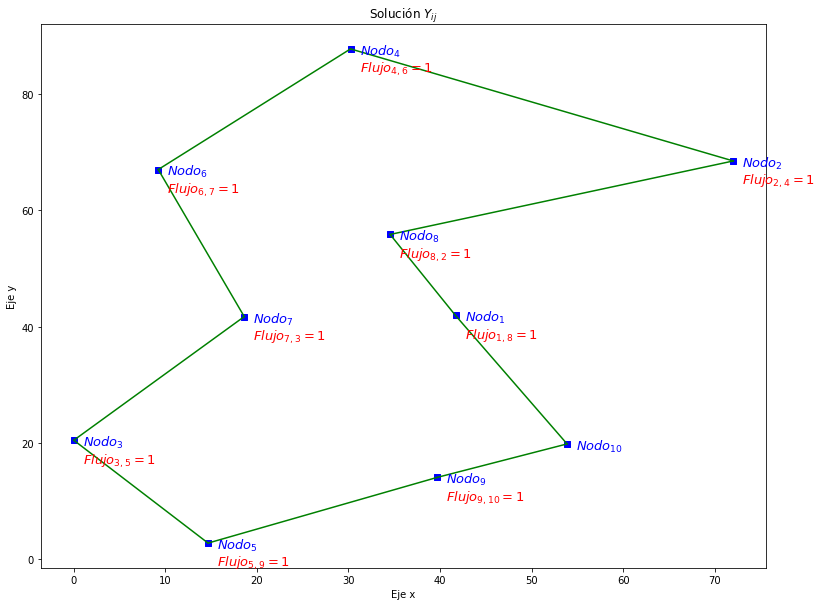

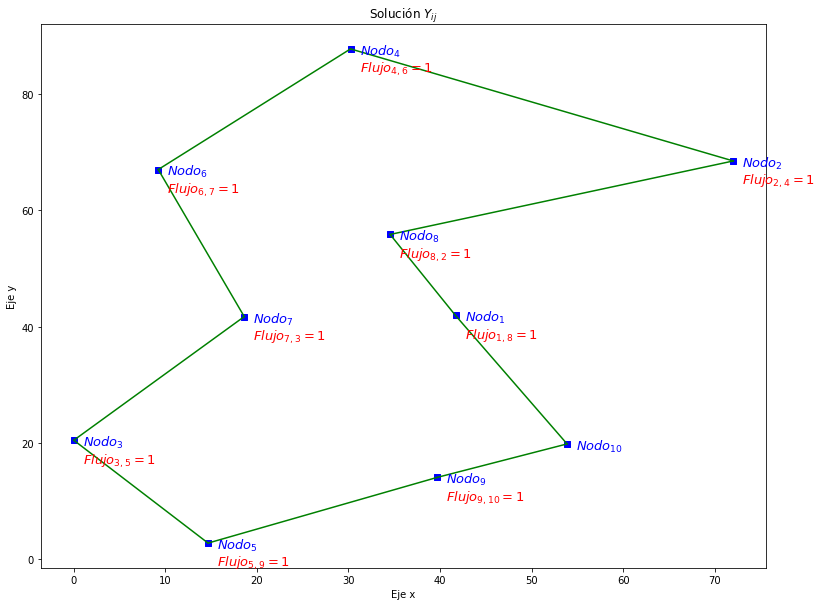

In [79]:
plt.figure(figsize=(13,10));
plt.scatter(x_coor,y_coor,color="blue",marker="s");

for i in range(len(N)):
    plt.annotate("$Nodo_{%d}$"%(i+1),(x_coor[i]+1,y_coor[i]-1),size=13, color="blue");

graph_arcos_activos = [True]*len(arcos_activos)

for n in arcos_activos:
    i=n[0]
    j=n[1]
    plt.plot([x_coor[i-1], x_coor[j-1]], [y_coor[i-1],y_coor[j-1]], color='green')

for n in IJK:
    i=n[0]
    j=n[1]
    k=n[2]
    if (i,j) in arcos_activos:
        pos = arcos_activos.index((i,j))
        if graph_arcos_activos[pos] and F[i,j,k].x>0.9:
            plt.annotate("$Flujo_{%d,%d}=%d$"%(i,j,F[i,j,k].x),(x_coor[i-1]+1,y_coor[i-1]-4),size=13, color="red")
            graph_arcos_activos[pos] = False
plt.xlabel("Eje x");
plt.ylabel("Eje y");
plt.title("Solución $Y_{ij}$");
plt.show();

In [80]:
model_TSP_b.runtime

0.027925491333007812

0.027925491333007812

In [81]:
model_TSP_a.runtime

0.033908843994140625

0.033908843994140625

In [82]:
import seaborn as sns

C:\Users\LabCivil1-Pc1\AppData\Roaming\Python\Python36\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\LabCivil1-Pc1\AppData\Roaming\Python\Python36\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [83]:
instancias = 10
Nodos_list = [10,20,30]
experiment = 0
rows = []
for i in range(instancias):
    experiment+=1
    for Nodos in Nodos_list:
        #np.random.seed(1)
        N = [n+1 for n in range(Nodos)]
        arcos=[(i,j) for i in N for j in N if i!=j]

        x_coor=list(np.random.random(len(N))*100)
        y_coor=list(np.random.random(len(N))*100)

        distancias={(i+1,j+1):np.hypot(x_coor[i]-x_coor[j],y_coor[i]-y_coor[j]) for i in range(len(N)) for j in range(len(N)) if i!=j} 

        C = distancias
        IJ = [(i,j) for i in N for j in N if i!=j]
        #Model parte a
        model_TSP_a = Model('model_TSP_a')
        model_TSP_a.setParam('LogToConsole', 0)
        Y, F = None, None
        
        Y = model_TSP_a.addVars(IJ, vtype=GRB.BINARY, name='Y')
        F = model_TSP_a.addVars(IJ, vtype=GRB.CONTINUOUS, name='F')
        
        objective = quicksum(C[(i,j)]*Y[(i,j)] for i,j in IJ)
        model_TSP_a.setObjective(expr=objective, sense=GRB.MINIMIZE)
        
        model_TSP_a.addConstrs(quicksum(Y[(i,j)] for j in N if i!=j)==1 for i in N)
        model_TSP_a.addConstrs(quicksum(Y[(j,i)] for j in N if i!=j)==1 for i in N)
        model_TSP_a.addConstrs(F[(i,j)]<=(len(N)-1)*Y[(i,j)] for i,j in IJ)
        model_TSP_a.addConstr(quicksum(F[(1,j)] for j in N if 1!=j)-quicksum(F[(j,1)] for j in N if 1!=j)==(len(N)-1))
        model_TSP_a.addConstrs(quicksum(F[(i,j)] for j in N if i!=j)-quicksum(F[(j,i)] for j in N if i!=j)==-1 for i in N[1:])
        model_TSP_a.update()
        model_TSP_a.optimize()
        
        objective_value_a = model_TSP_a.ObjVal
        time_secs_a = model_TSP_a.runtime
        
        #Model parte b
        
        Y, F = None, None
        K = [k+1 for k in range(Nodos)]
        IJK = [(i,j,k) for i,j in IJ for k in K]
        
        model_TSP_b = Model('model_TSP_b')
        model_TSP_b.setParam('LogToConsole', 0)
        
        
        Y = model_TSP_b.addVars(IJ, vtype=GRB.BINARY, name='Y')
        F = model_TSP_b.addVars(IJK, vtype=GRB.CONTINUOUS, name='F')        
        
        objective = quicksum(C[(i,j)]*Y[(i,j)] for i,j in IJ)
        model_TSP_b.setObjective(expr=objective, sense=GRB.MINIMIZE)        
        
        model_TSP_b.addConstrs(quicksum(Y[(i,j)] for j in N if j!=i)==1 for i in N)
        model_TSP_b.addConstrs(quicksum(Y[(j,i)] for j in N if j!=i)==1 for i in N)
        model_TSP_b.addConstrs(F[(i,j,k)]<=Y[(i,j)] for i,j in IJ for k in K[1:])
        model_TSP_b.addConstrs(quicksum(F[(i,j,k)] for j in N if j!=i)-quicksum(F[(j,i,k)] for j in N if j!=i)==RHS(i,k) for i in N for k in K[1:])
        model_TSP_b.optimize()

        objective_value_b = model_TSP_b.ObjVal
        time_secs_b = model_TSP_b.runtime
        
        row = {
            'experiment':experiment,
            'nodos':Nodos,
            'objective_value_a':objective_value_a,
            'time_secs_a':time_secs_a,
            'objective_value_b':objective_value_b,
            'time_secs_b':time_secs_b
        }
        rows.append(row)
    print(experiment)
df = pd.DataFrame(rows)

1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10


Text(0.5, 0, 'Nodos')

Text(0.5, 0, 'Nodos')

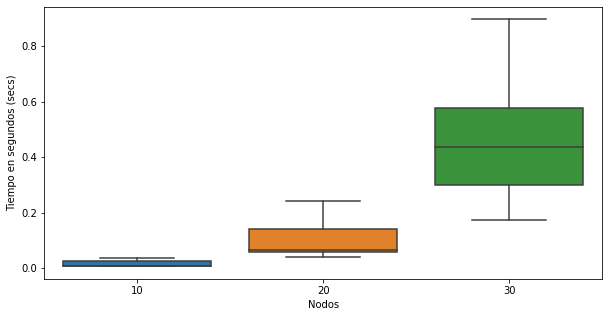

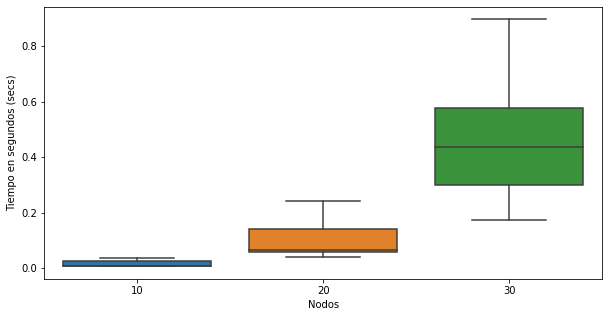

In [84]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='nodos', y = 'time_secs_a')
plt.ylabel('Tiempo en segundos (secs)')
plt.xlabel('Nodos')

Text(0.5, 0, 'Nodos')

Text(0.5, 0, 'Nodos')

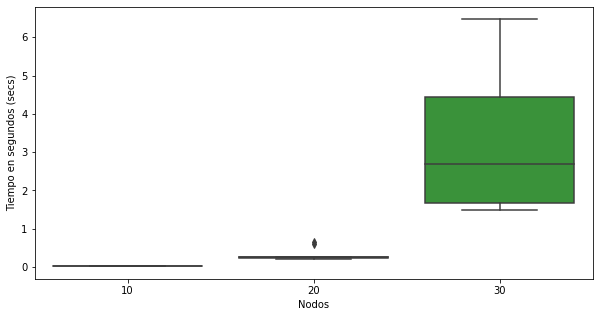

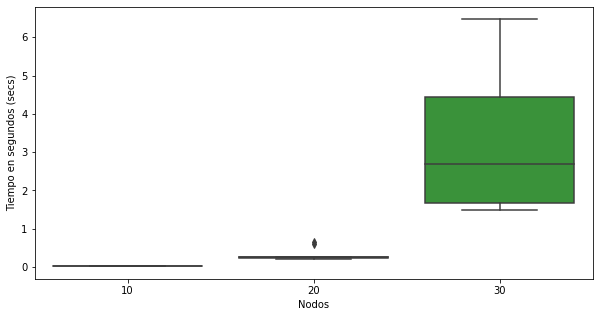

In [85]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='nodos', y = 'time_secs_b')
plt.ylabel('Tiempo en segundos (secs)')
plt.xlabel('Nodos')

In [86]:
time_secs_a, time_secs_b = list(df.time_secs_a), list(df.time_secs_b)
TSP_a = ['A']*len(time_secs_a)
TSP_b = ['B']*len(time_secs_b)
TSP = TSP_a + TSP_b
time_secs = time_secs_a + time_secs_b
df2 = {'TSP':TSP, 'time_secs':time_secs}
df2 = pd.DataFrame(df2)

In [87]:
df2.head(2)

,TSP,time_secs
0,A,0.012966
1,A,0.207445


,TSP,time_secs
0,A,0.012966
1,A,0.207445


Text(0.5, 0, 'Modelo')

Text(0.5, 0, 'Modelo')

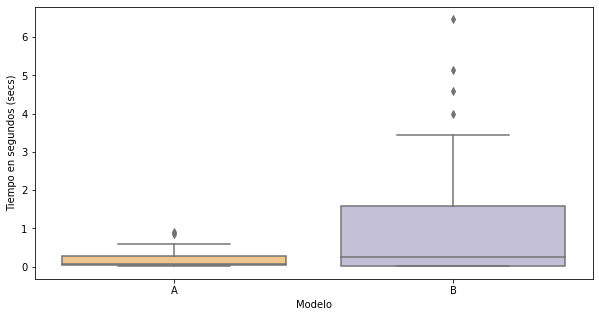

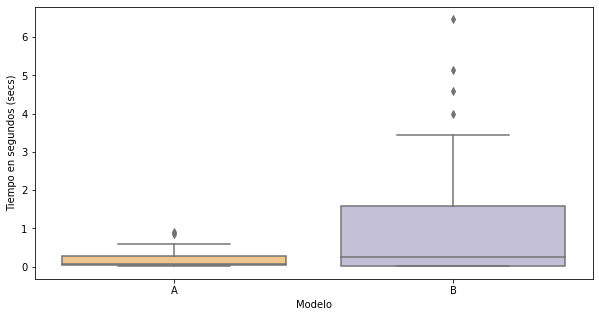

In [88]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df2, x='TSP', y = 'time_secs', palette = 'PuOr')
plt.ylabel('Tiempo en segundos (secs)')
plt.xlabel('Modelo')